<a href="https://colab.research.google.com/github/Vishesh-16/Data-Projects/blob/main/Telcom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

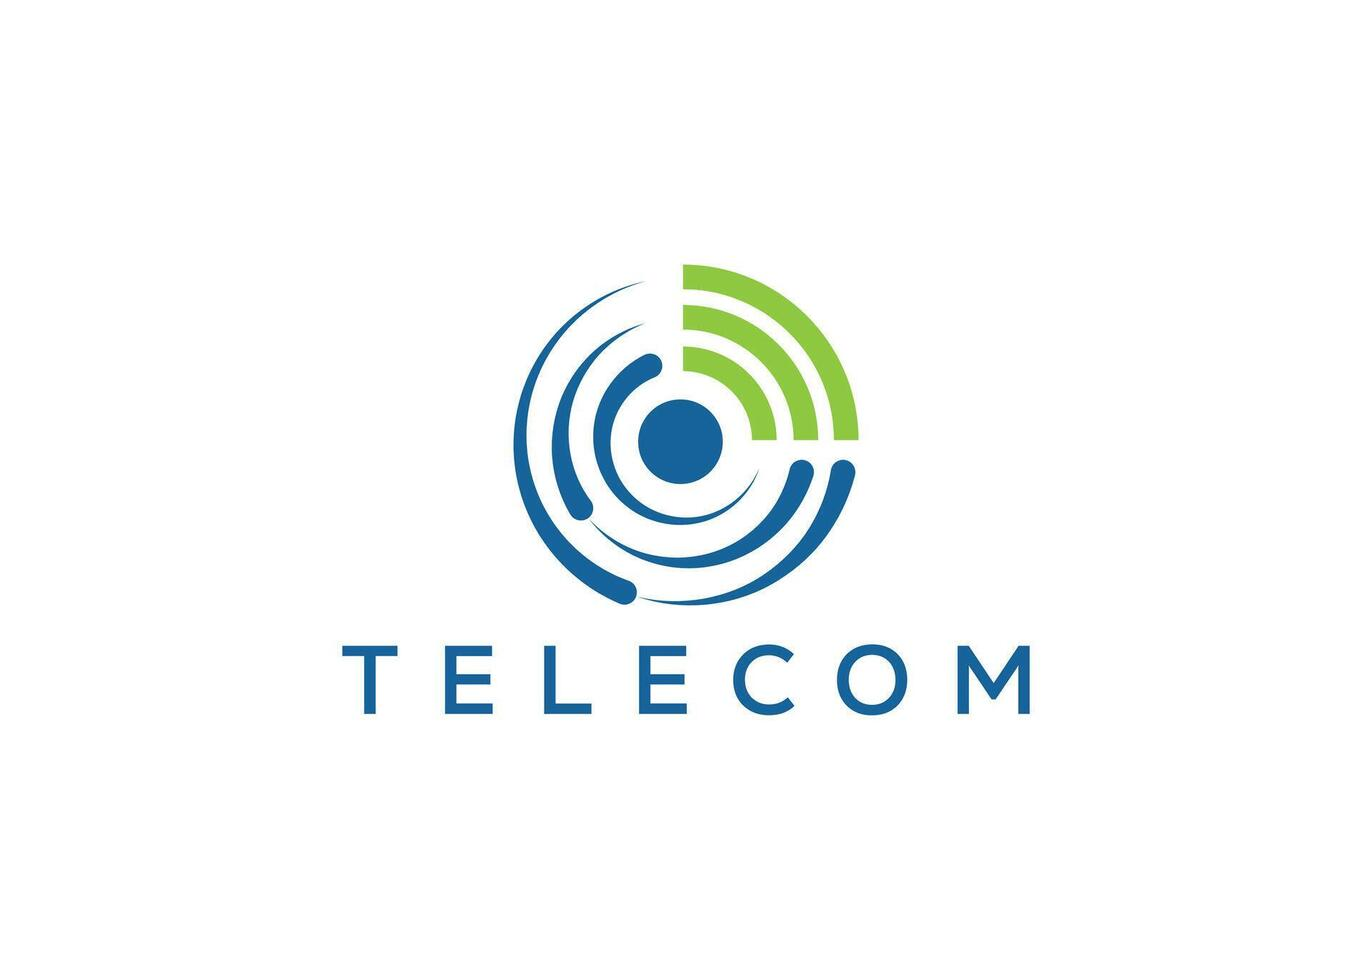

# **INTRODUCTION**

**Customer churn**, the phenomenon where customers stop doing business with a company, is a critical metric for subscription-based services. Understanding and predicting churn helps companies proactively address customer dissatisfaction and improve retention strategies.

# **PROBLEM STATEMENT:**

- Identify factors that influence customer churn.

- Develop a predictive model that can classify customers as likely to churn or not.

- Improve recall (identify as many churners as possible).

- Compare different classification models for churn prediction.

- Visualize insights through univariate and bivariate analysis.

- Handle imbalanced data and threshold tuning for performance optimization.

# **IMPORTING DATASET**

In [168]:
!wget "https://raw.githubusercontent.com/Vishesh-16/Data-Projects/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv" -O "data.csv"

--2025-07-04 12:35:40--  https://raw.githubusercontent.com/Vishesh-16/Data-Projects/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 954.59K  --.-KB/s    in 0.06s   

2025-07-04 12:35:40 (16.2 MB/s) - ‘data.csv’ saved [977501/977501]



# **EXPLORATORY DATA ANALYSIS**

In [169]:
import pandas as pd
df = pd.read_csv("data.csv")

In [170]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [171]:
print("No of rows:",df.shape[0])
print("No of columns:",df.shape[1])

No of rows: 7043
No of columns: 21


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [173]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [174]:
df.isnull().sum()/df.shape[0]*100

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


In [175]:
df.duplicated().sum()

np.int64(0)

In [176]:
cols = df.columns
for col in cols:
  print(col,df[col].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


In [154]:
#Delete cust_id due to high cardinality

df.drop(columns = "customerID",inplace=True)

In [156]:
cols = df.columns

## UNIVARIATE and BIVARIATE ANALYSIS

OUTLIERS, GRAPHS

**CATEGORICAL FEATURES**

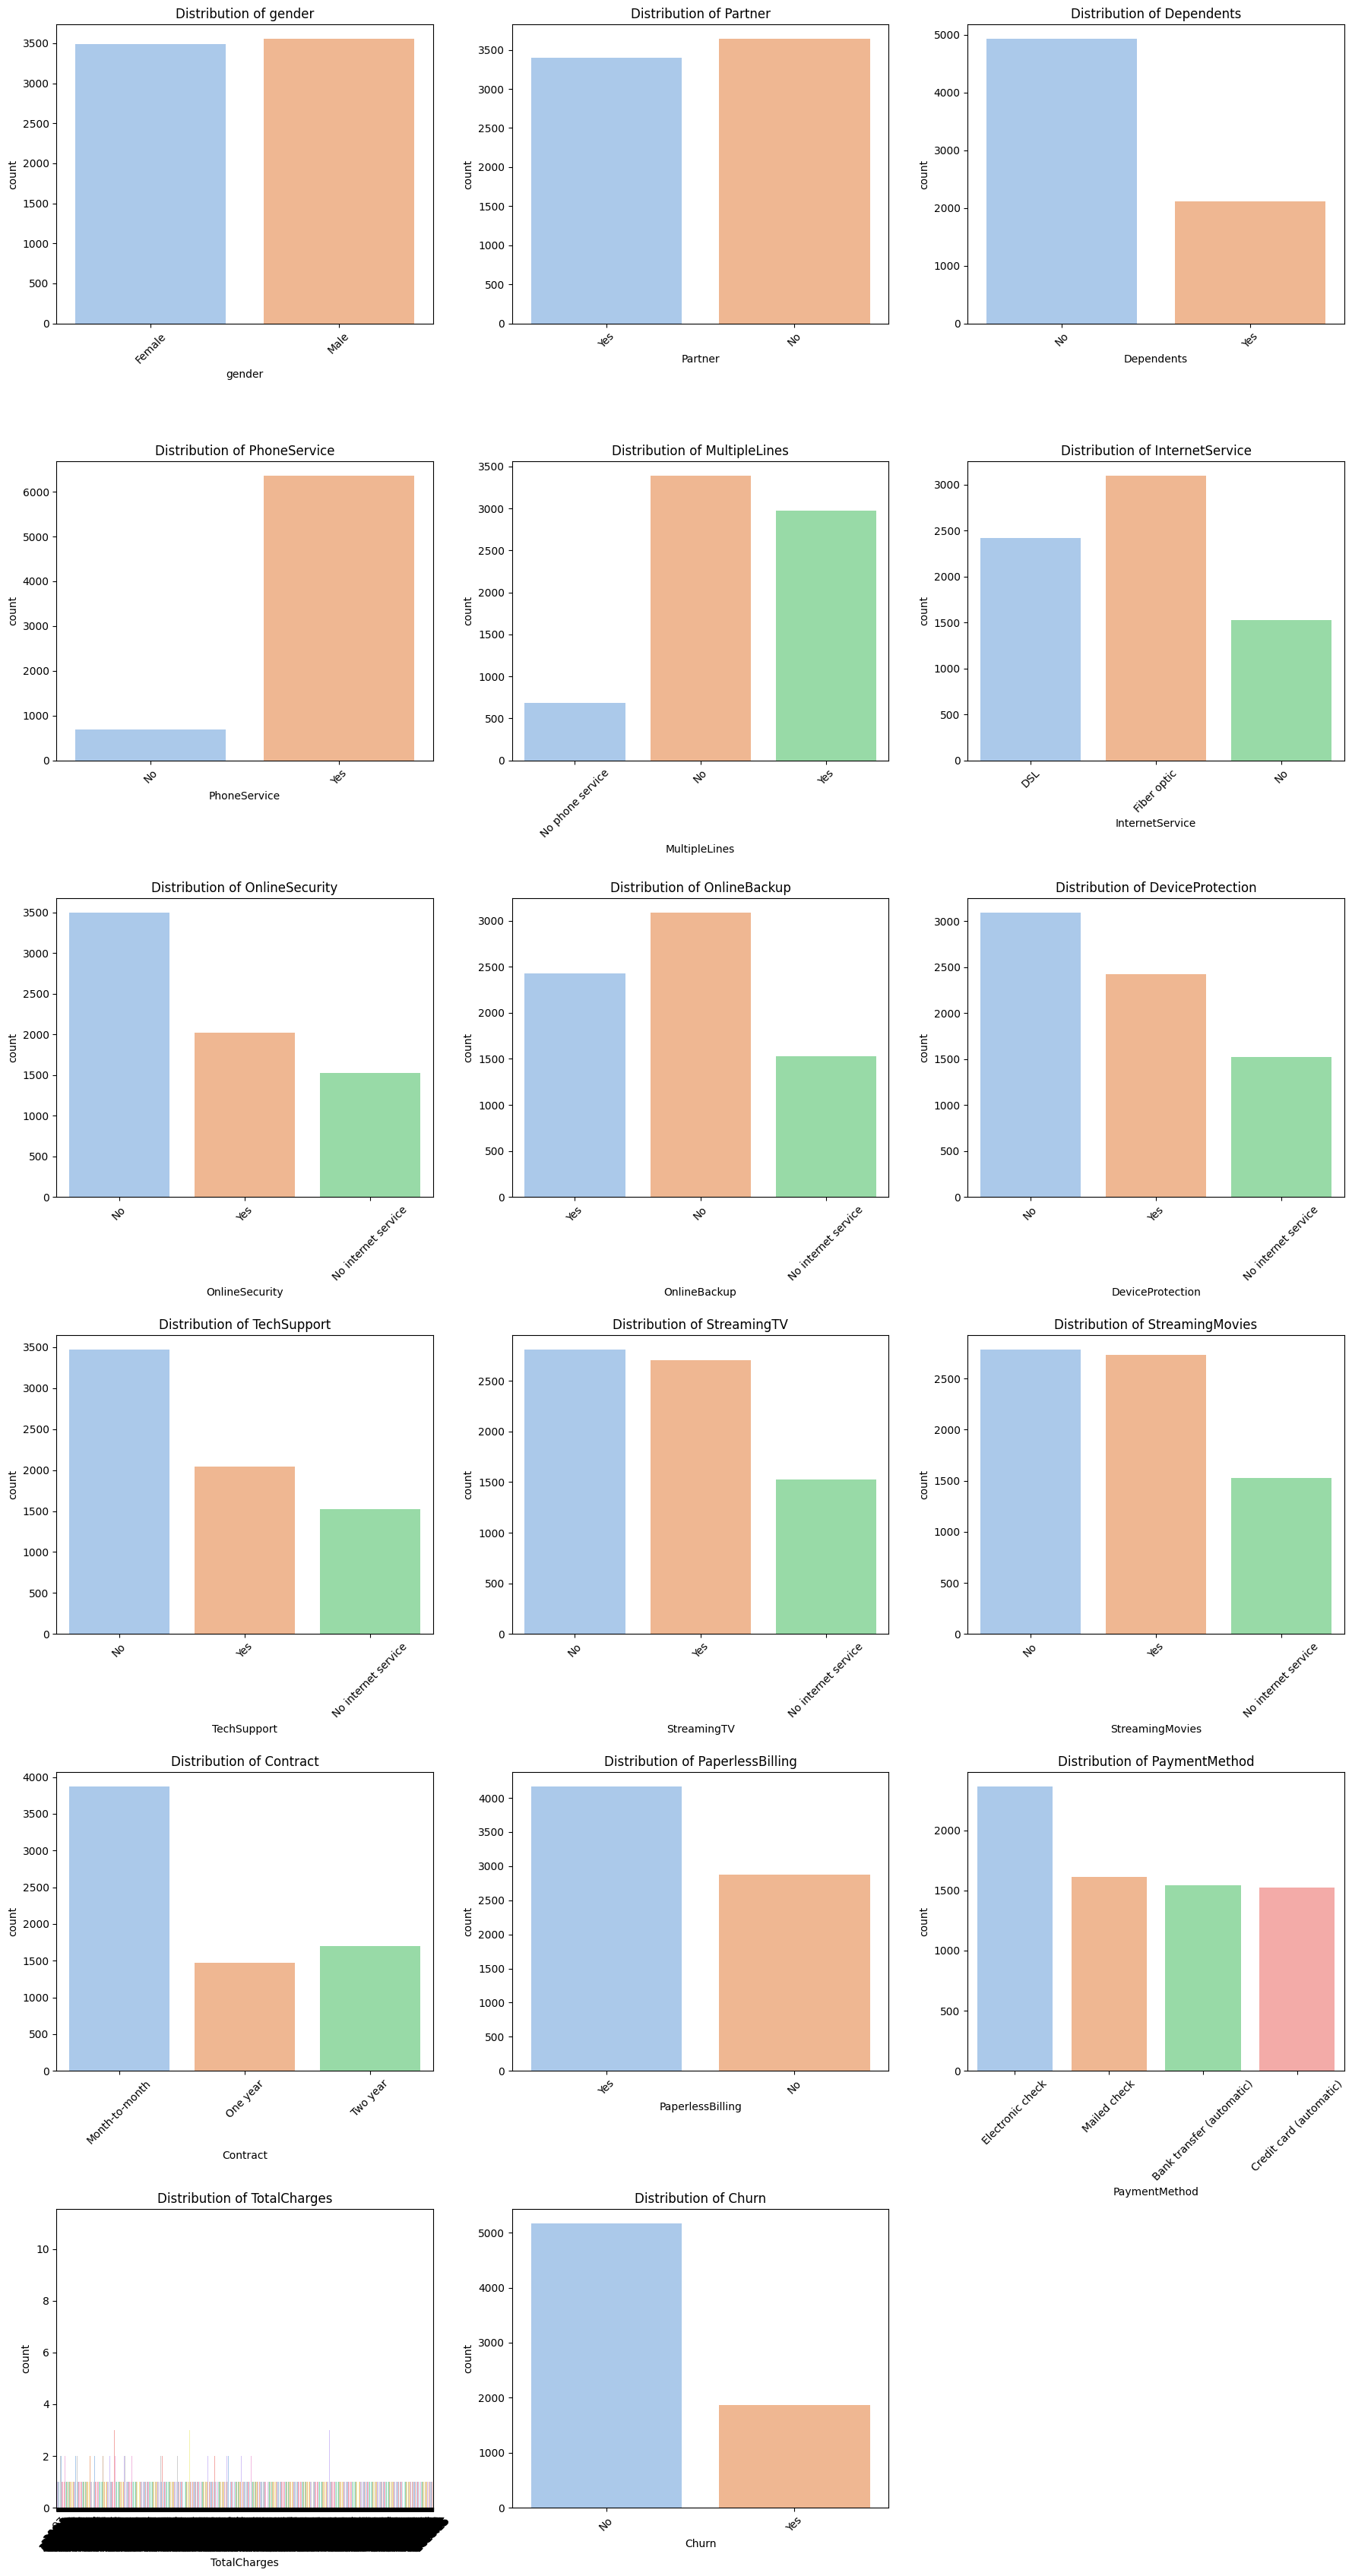

In [179]:

categorical = df.select_dtypes(include=['object']).columns.drop(['customerID'])
fig, axes = plt.subplots(nrows=(len(categorical) + 2)//3, ncols=3, figsize=(18, len(categorical)*2))
axes = axes.flatten()
for i, col in enumerate(categorical):
    sns.countplot(data=df, x=col, ax=axes[i], palette='pastel')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()



**Numerical Features**

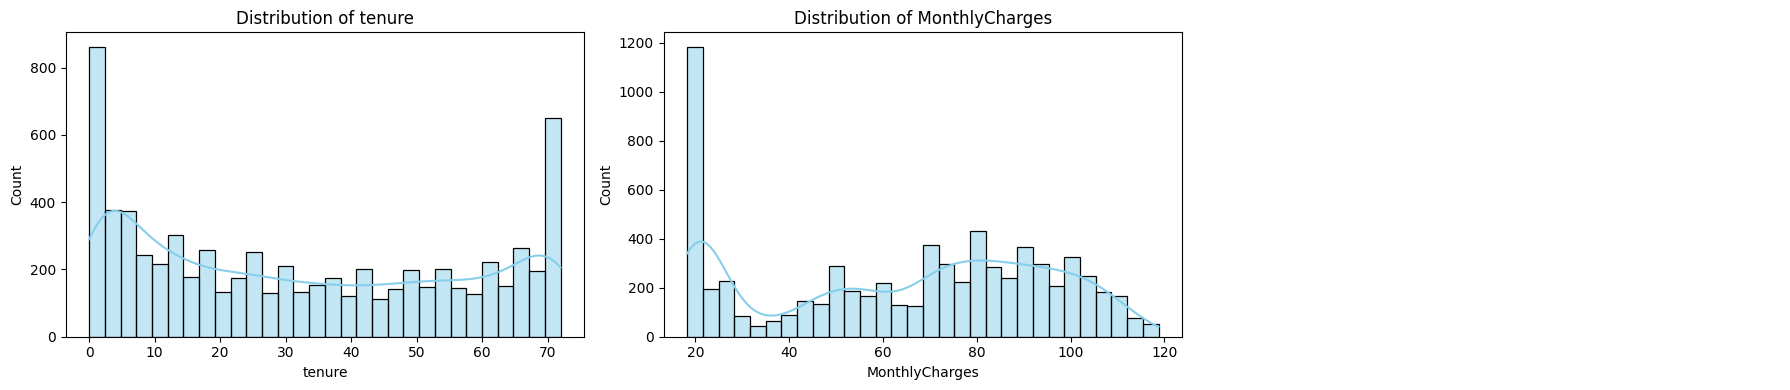

In [180]:

numerical = ['tenure', 'MonthlyCharges']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
for i, col in enumerate(numerical):
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, 3):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

## **BIVARIATE ANALYSIS**

**CHURN vs CATEGORICAL**

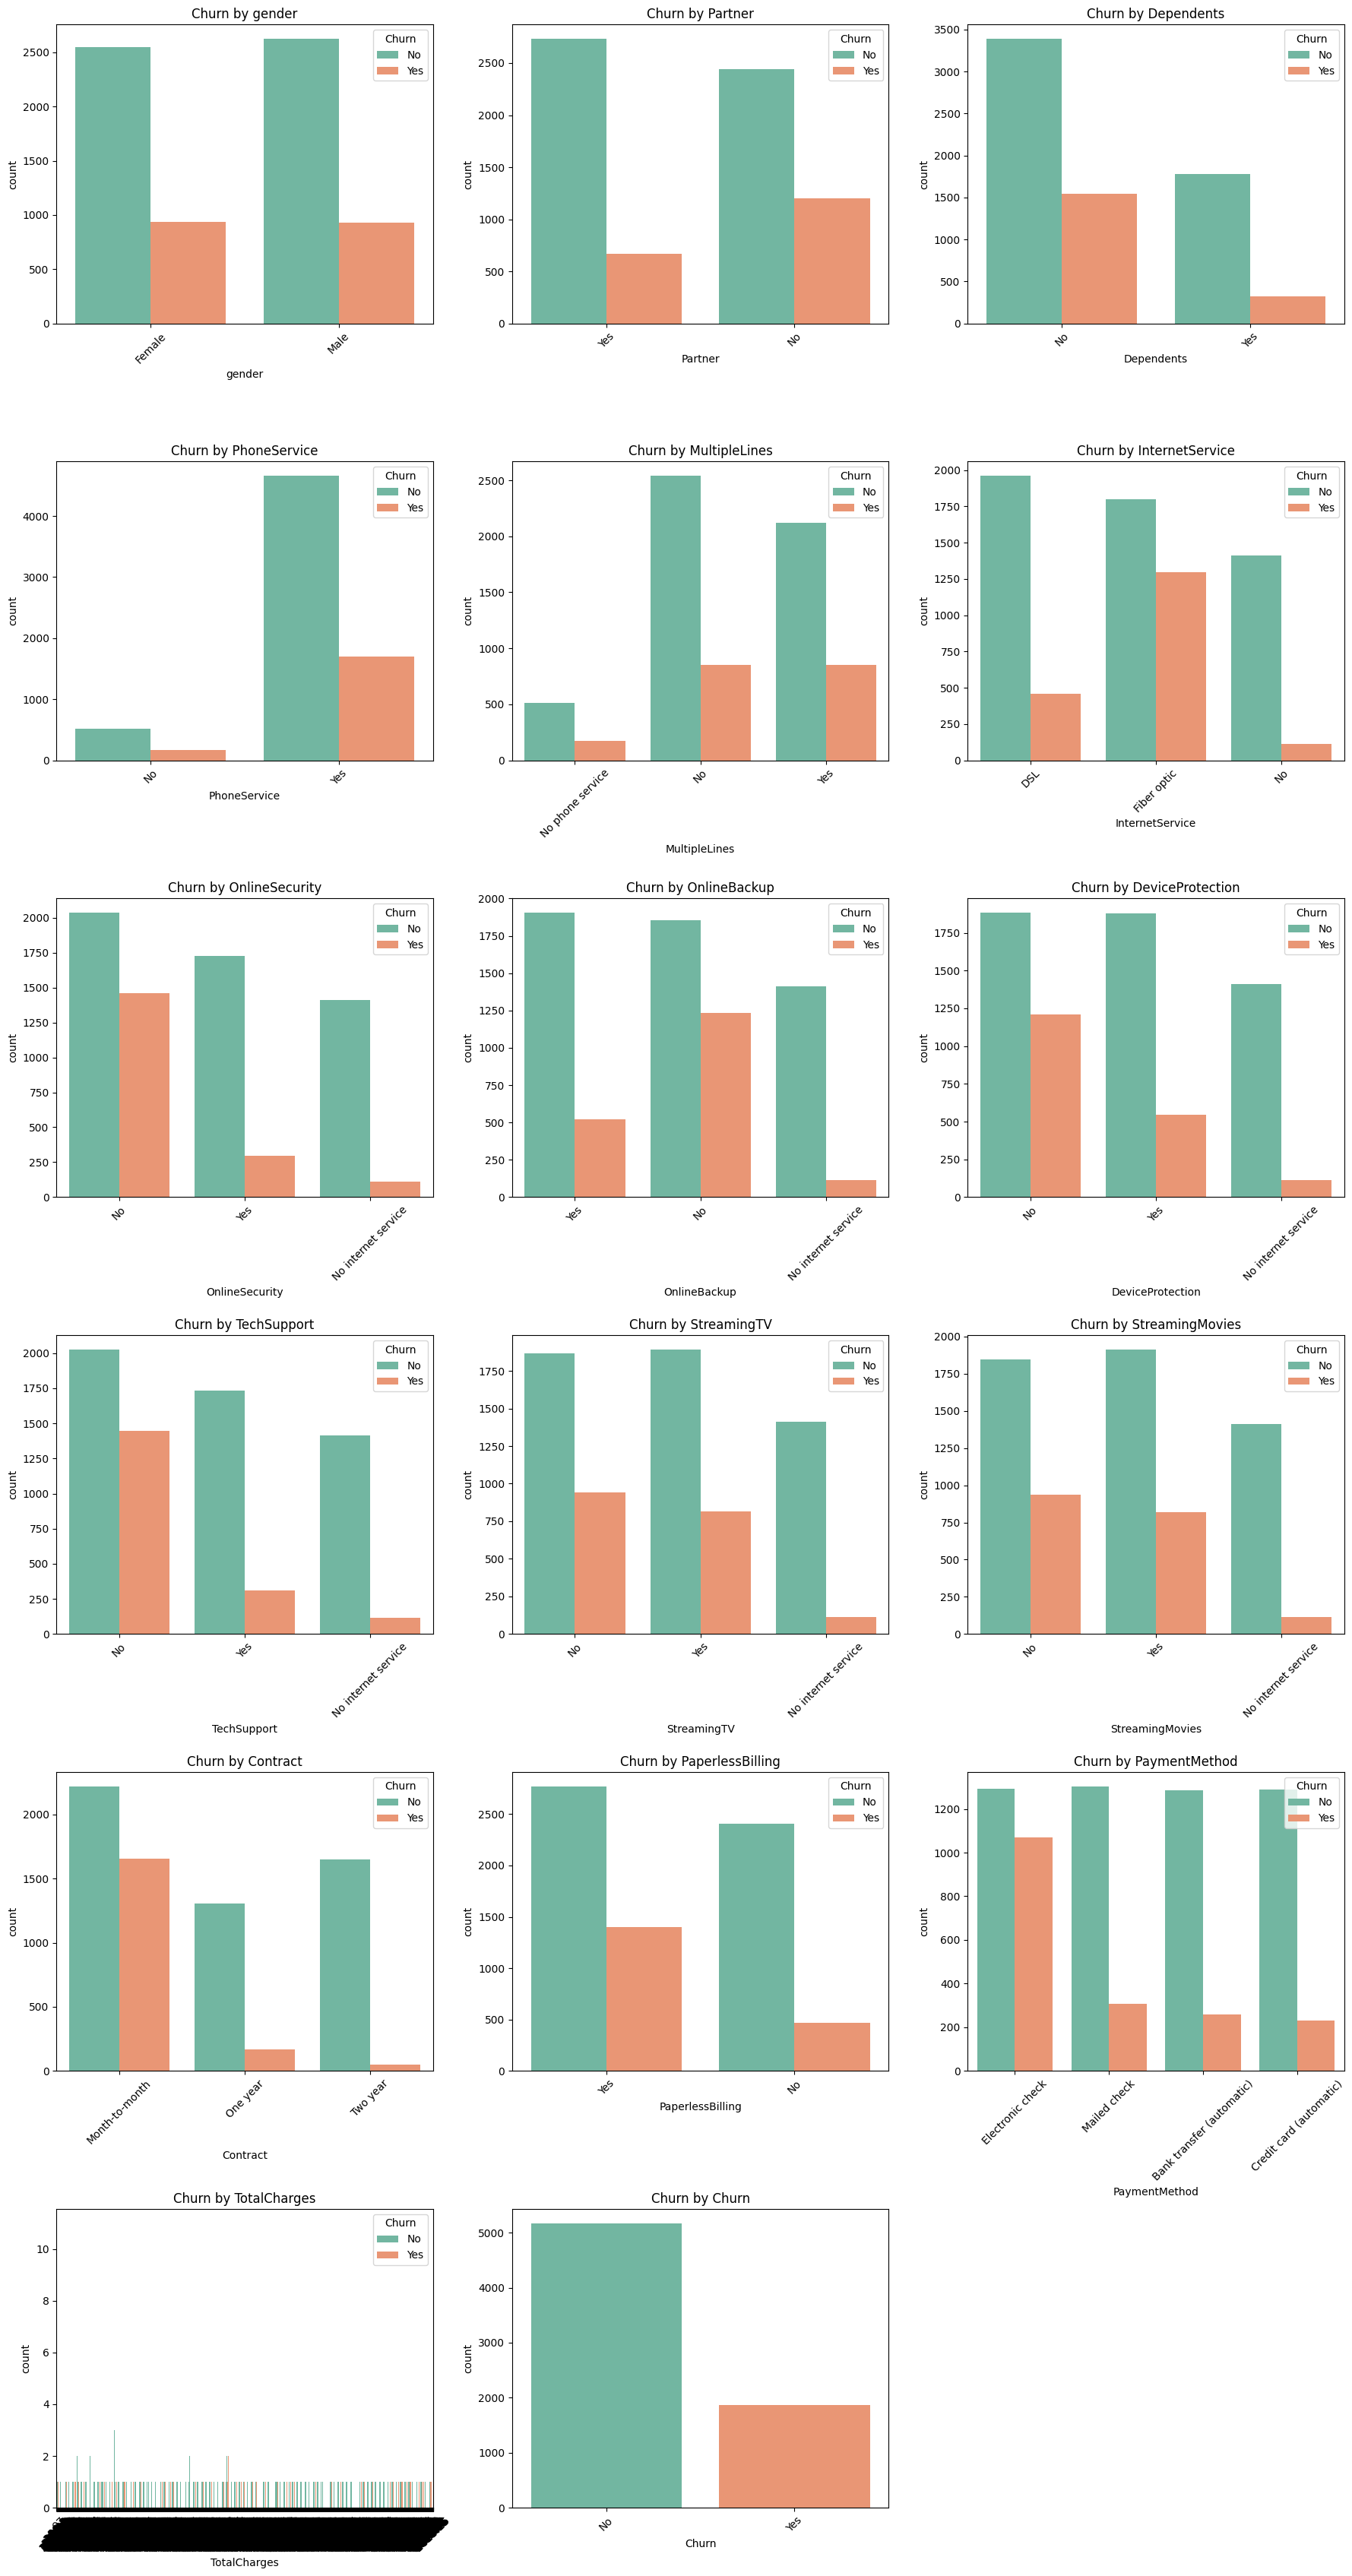

In [181]:
fig, axes = plt.subplots(nrows=(len(categorical) + 2)//3, ncols=3, figsize=(18, len(categorical)*2))
axes = axes.flatten()
for i, col in enumerate(categorical):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette='Set2')
    axes[i].set_title(f"Churn by {col}")
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()




**CHURN vs NUMERICAL**

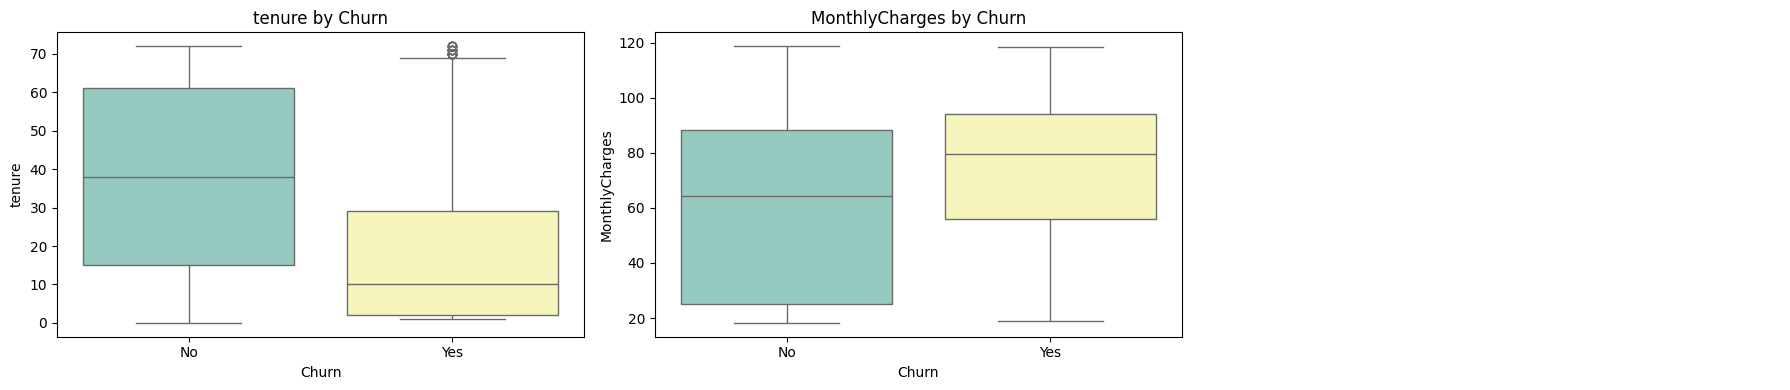

In [182]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
for i, col in enumerate(numerical):
    sns.boxplot(x='Churn', y=col, data=df, palette='Set3', ax=axes[i])
    axes[i].set_title(f"{col} by Churn")
for j in range(i+1, 3):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

## **OUTLIER DETECTION**

In [183]:
# Z-score method for numerical outliers
def detect_outliers_zscore(data, threshold=3):
    from scipy.stats import zscore
    z_scores = zscore(data)
    return data[(abs(z_scores) > threshold)]

outliers = {}
for col in numerical:
    outlier_vals = detect_outliers_zscore(df[col])
    if not outlier_vals.empty:
        outliers[col] = outlier_vals

# Treat outliers by capping
for col in numerical:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower, upper)

print("Outlier detection and capping complete.")

Outlier detection and capping complete.


# **EDA ANALYSIS:**

- **Univariate Analysis (Distribution of Each Variable)**
  - **Categorical Variables:**
    - Count plots show dominant values for features like gender, Contract, InternetService, etc.

 - **Numerical Variables:**

    - tenure is right-skewed with many short-term customers.

    - MonthlyCharges is slightly left-skewed.

- **Bivariate Analysis (Feature vs. Churn)**
  - Contract Type: Customers on month-to-month contracts are more likely to churn.

  - Tenure: Longer-tenured customers are less likely to churn.

  - OnlineSecurity and TechSupport: Their absence is associated with higher churn.

  - Payment Method: Electronic check customers churn more than others.

- **Outlier Detection & Treatment**
  - Z-score and IQR methods were used.

  - Outliers were capped to reduce their influence without deleting data.



# **FEATURE ENGINEERING**

In [157]:
for col in cols:
  if df[col].nunique() == 3:
    print(df[col],df[col].value_counts())

0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7043, dtype: object MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
7038    Yes
7039     No
7040    Yes
7041     No
7042    Yes
Name: OnlineSecurity, Length: 7043, dtype: object Online

In [158]:
cols_1 = ["MonthlyCharges","TotalCharges"]
for col in cols_1:
  df[col] = pd.to_numeric(df[col],errors="coerce")

In [159]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [160]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [161]:
binary_cols = []
cols = df.columns
for col in cols:
  if df[col].nunique() == 2:
    binary_cols.append(col)

In [162]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [163]:
cols_2 = []
for col in cols:
  if df[col].nunique() == 3:
    cols_2.append(col)

In [164]:
cols_2

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract']

In [165]:
for i in cols_2:
  print(i,df[i].unique())

MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']


In [166]:
no_internet_cols = []
for col in cols:
  if (df[col] == "No internet service").any():
    no_internet_cols.append(col)

In [85]:
no_internet_cols

['OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [86]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [87]:
df["estimated_charges"] = df["MonthlyCharges"] * df["tenure"]

In [88]:
df[["estimated_charges","TotalCharges"]]

,estimated_charges,TotalCharges
0,29.85,29.85
1,1936.30,1889.50
2,107.70,108.15
3,1903.50,1840.75
4,141.40,151.65
...,...,...
7038,2035.20,1990.50
7039,7430.40,7362.90
7040,325.60,346.45
7041,297.60,306.60


In [89]:
df[["estimated_charges","TotalCharges"]].corr()

,estimated_charges,TotalCharges
estimated_charges,1.00000,0.99956
TotalCharges,0.99956,1.00000


ALMOST PERFECTLY CORELATED.

We can drop any one of the columns..

But first, we can calculate vif, then delete.

In [90]:
df['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [92]:
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
labels = [
    '0-5', '5-10', '10-15', '15-20', '20-25',
    '25-30', '30-35', '35-40', '40-45', '45-50',
    '50-55', '55-60', '60-65', '65-70', '70-75'
]


In [93]:
df["tenure_bins"] = pd.cut(df['tenure'],bins,labels=labels,right=False)

In [94]:
df[['tenure','tenure_bins']]

,tenure,tenure_bins
0,1,0-5
1,34,30-35
2,2,0-5
3,45,45-50
4,2,0-5
...,...,...
7038,24,20-25
7039,72,70-75
7040,11,10-15
7041,4,0-5


# ENCODING

In [95]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [96]:
binary_cols.remove('gender')

In [97]:
df= pd.get_dummies(df, columns=['gender'], drop_first=True)


In [35]:
binary_cols

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in binary_cols:
  df[col] = le.fit_transform(df[col])


In [37]:
cols_2

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract']

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cols_2:
  df[col] = le.fit_transform(df[col])

In [39]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins,gender_Male
0,0,1,0,1,0,1,0,0,2,0,...,0,0,0,1,Electronic check,29.85,29.85,0,0-5,False
1,0,0,0,34,1,0,0,2,0,2,...,0,0,1,0,Mailed check,56.95,1889.50,0,30-35,True
2,0,0,0,2,1,0,0,2,2,0,...,0,0,0,1,Mailed check,53.85,108.15,1,0-5,True
3,0,0,0,45,0,1,0,2,0,2,...,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0,45-50,True
4,0,0,0,2,1,0,1,0,0,0,...,0,0,0,1,Electronic check,70.70,151.65,1,0-5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,0,2,0,2,...,2,2,1,1,Mailed check,84.80,1990.50,0,20-25,True
7039,0,1,1,72,1,2,1,0,2,2,...,2,2,1,1,Credit card (automatic),103.20,7362.90,0,70-75,False
7040,0,1,1,11,0,1,0,2,0,0,...,0,0,0,1,Electronic check,29.60,346.45,0,10-15,False
7041,1,1,0,4,1,2,1,0,0,0,...,0,0,0,1,Mailed check,74.40,306.60,1,0-5,True


In [31]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [40]:
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

In [41]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins,gender_Male
0,0,1,0,1,0,1,0,0,2,0,...,0,0,0,1,2,29.85,29.85,0,0-5,False
1,0,0,0,34,1,0,0,2,0,2,...,0,0,1,0,3,56.95,1889.50,0,30-35,True
2,0,0,0,2,1,0,0,2,2,0,...,0,0,0,1,3,53.85,108.15,1,0-5,True
3,0,0,0,45,0,1,0,2,0,2,...,0,0,1,0,0,42.30,1840.75,0,45-50,True
4,0,0,0,2,1,0,1,0,0,0,...,0,0,0,1,2,70.70,151.65,1,0-5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,0,2,0,2,...,2,2,1,1,3,84.80,1990.50,0,20-25,True
7039,0,1,1,72,1,2,1,0,2,2,...,2,2,1,1,1,103.20,7362.90,0,70-75,False
7040,0,1,1,11,0,1,0,2,0,0,...,0,0,0,1,2,29.60,346.45,0,10-15,False
7041,1,1,0,4,1,2,1,0,0,0,...,0,0,0,1,3,74.40,306.60,1,0-5,True


In [42]:
df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)


,Churn
Churn,1.000000
MonthlyCharges,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
MultipleLines,0.038037
PhoneService,0.011942
gender_Male,-0.008612
StreamingTV,-0.036581
StreamingMovies,-0.038492


In [43]:
correlation_matrix = df.corr(numeric_only=True)



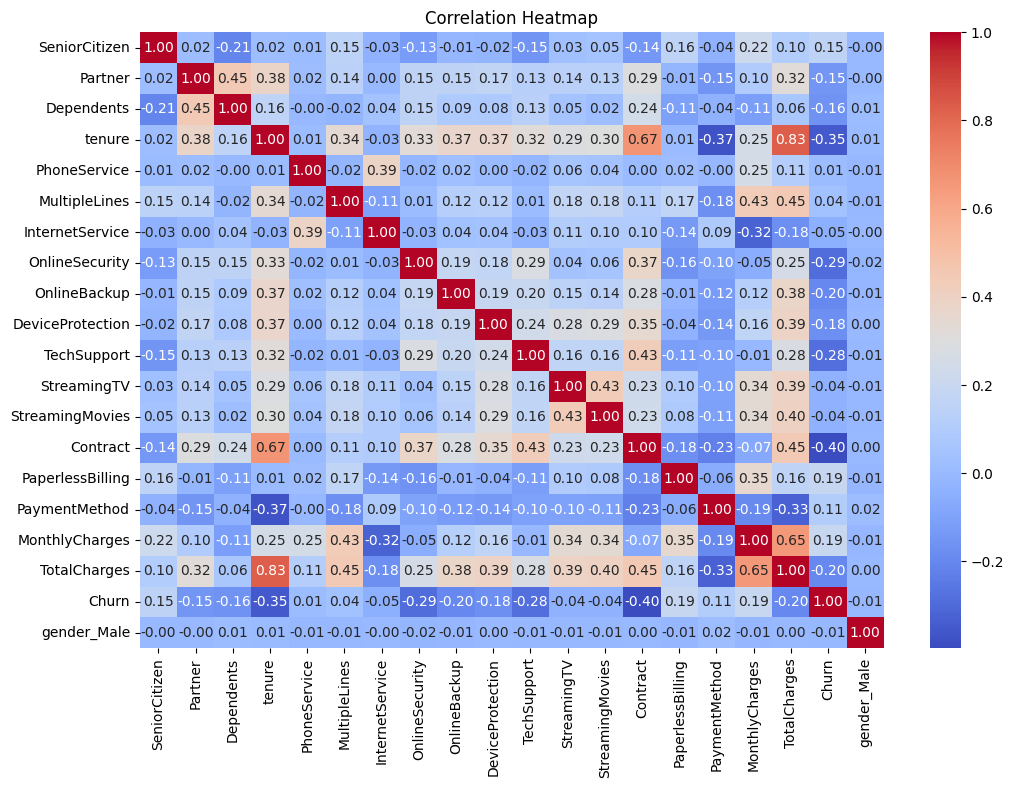

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



ANALYSIS:


### ✅ **1. Top Correlations with `Churn`**

These indicate features most related to whether a customer churns:

| Feature              | Correlation with Churn | Interpretation                                              |
| -------------------- | ---------------------- | ----------------------------------------------------------- |
| **Contract**         | **-0.40**              | 🔥 Strong negative → long-term contracts reduce churn.      |
| **tenure**           | **-0.35**              | 🔻 Longer tenure = less likely to churn                     |
| **OnlineSecurity**   | **-0.29**              | 🔒 Security reduces churn                                   |
| **TechSupport**      | **-0.28**              | 📞 Support availability = less churn                        |
| **MonthlyCharges**   | **+0.19**              | 💰 Higher charges may increase churn                        |
| **PaperlessBilling** | **+0.19**              | 🧾 Paperless billing is slightly associated with more churn |

  - Negative correlation = less likely to churn
  - Positive correlation = more likely to churn

---
---

### ✅ **2. Strong Feature Correlations (Multicollinearity)**

Look out for pairs > 0.8 — these could be **redundant**:

| Feature 1        | Feature 2      | Corr     | Action                                |
| ---------------- | -------------- | -------- | ------------------------------------- |
| `TotalCharges`   | `tenure`       | **0.83** | ✅ Keep one (likely tenure)            |
| `MonthlyCharges` | `TotalCharges` | **0.65** | ↔ Moderate relation                   |
| `Contract`       | `tenure`       | **0.67** | Related, but both are useful in churn |

So:

* **Drop one of `tenure` or `TotalCharges`** (they are capturing the same signal).
* Keep `MonthlyCharges` since it's independently informative.

---
---

### ❌ **Low-Impact Features**

These have weak or no correlation with churn:

| Feature            | Corr with Churn |
| ------------------ | --------------- |
| `gender_Male`      | 0.01            |
| `PhoneService`     | 0.01            |
| `DeviceProtection` | -0.08           |

👉 These don’t add predictive power for churn.

---
---

###  Other Observations:

* `Contract`, `OnlineSecurity`, `TechSupport` are **key churn indicators**
* `StreamingTV`, `StreamingMovies`, `Partner`, `Dependents` have mild-to-low impact
* `PaperlessBilling` is positively related with churn, but weakly

---
---

### Recommendations:

1. **Drop**:

   * `TotalCharges` (keep `tenure`)
   * `gender_Male`, `PhoneService`, `DeviceProtection` (if model performance is unaffected)

2. **Focus on**:

   * `Contract`, `tenure`, `OnlineSecurity`, `TechSupport`, `MonthlyCharges`

3. **Consider one-hot encoding** if you haven’t already — especially for:

   * `Contract` (Month-to-Month, One year, Two year)
   * `InternetService` types

---



# **MODEL BUILDING**

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SeniorCitizen     7043 non-null   int64   
 1   Partner           7043 non-null   int64   
 2   Dependents        7043 non-null   int64   
 3   tenure            7043 non-null   int64   
 4   PhoneService      7043 non-null   int64   
 5   MultipleLines     7043 non-null   int64   
 6   InternetService   7043 non-null   int64   
 7   OnlineSecurity    7043 non-null   int64   
 8   OnlineBackup      7043 non-null   int64   
 9   DeviceProtection  7043 non-null   int64   
 10  TechSupport       7043 non-null   int64   
 11  StreamingTV       7043 non-null   int64   
 12  StreamingMovies   7043 non-null   int64   
 13  Contract          7043 non-null   int64   
 14  PaperlessBilling  7043 non-null   int64   
 15  PaymentMethod     7043 non-null   int64   
 16  MonthlyCharges    7043 n

In [55]:
# Convert boo to integer
df['gender_Male'] = df['gender_Male'].astype(int)

In [56]:
#drop missing values in totalcharges
df = df.dropna(subset=['TotalCharges'])

In [57]:
# drop the category tenure_bins column
df = df.drop(columns=['tenure_bins'])

# **VARIANCE INFLATION FACTOR**

CHECKING COLINEARITY BETWEEN FEATURES

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

Y = df["Churn"] #create target column
X = df.drop(columns=['Churn'])  # drop target

X = add_constant(X)  # Add constant for intercept

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values("VIF", ascending=False))

             feature        VIF
0              const  34.800309
18      TotalCharges  10.618697
4             tenure   7.493654
17    MonthlyCharges   4.967861
14          Contract   2.493335
7    InternetService   1.824359
5       PhoneService   1.622695
2            Partner   1.461171
13   StreamingMovies   1.447896
12       StreamingTV   1.446947
6      MultipleLines   1.395898
3         Dependents   1.379721
11       TechSupport   1.321878
10  DeviceProtection   1.297942
8     OnlineSecurity   1.268758
9       OnlineBackup   1.219068
15  PaperlessBilling   1.202566
16     PaymentMethod   1.186112
1      SeniorCitizen   1.149648
19       gender_Male   1.001876


In [59]:
X.columns

Index(['const', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender_Male'],
      dtype='object')

In [61]:
#temporarily dropping totalCharges column

X = X.drop('TotalCharges', axis=1)

In [62]:
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df.sort_values("VIF", ascending=False))

             feature        VIF
0              const  22.559642
4             tenure   2.798522
17    MonthlyCharges   2.730286
14          Contract   2.480415
7    InternetService   1.823433
5       PhoneService   1.622539
2            Partner   1.461064
12       StreamingTV   1.443787
13   StreamingMovies   1.443654
6      MultipleLines   1.393720
3         Dependents   1.379226
11       TechSupport   1.303485
10  DeviceProtection   1.279919
8     OnlineSecurity   1.247630
15  PaperlessBilling   1.202347
9       OnlineBackup   1.186841
16     PaymentMethod   1.179946
1      SeniorCitizen   1.149478
18       gender_Male   1.001676


In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 19), (1407, 19), (5625,), (1407,))

In [109]:
import statsmodels.api as sm

# X = your features, y = target
X = sm.add_constant(X)  # adds intercept (bias)
model = sm.Logit(Y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.417703
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7013
Method:                           MLE   Df Model:                           18
Date:                Fri, 04 Jul 2025   Pseudo R-squ.:                  0.2786
Time:                        11:51:52   Log-Likelihood:                -2937.3
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9809      0.152     -6.469      0.000      -1.278      -0.684
SeniorCitiz

# **LOGISTIC REGRESSION**

In [111]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, Y)

# Coefficients and intercept
print(model.coef_)
print(model.intercept_)


[[-0.53299607  0.2394965   0.01862124 -0.17561167 -0.03470126 -0.89296527
   0.10033908  0.23731317 -0.26508846 -0.12952669 -0.07528797 -0.24935545
   0.01136035  0.0159803  -0.68531699  0.36942485  0.07212858  0.02760568
  -0.01522266]]
[-0.54573516]


In [112]:
pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})


,Feature,Coefficient
0,const,-0.532996
1,SeniorCitizen,0.239496
2,Partner,0.018621
3,Dependents,-0.175612
4,tenure,-0.034701
5,PhoneService,-0.892965
6,MultipleLines,0.100339
7,InternetService,0.237313
8,OnlineSecurity,-0.265088
9,OnlineBackup,-0.129527


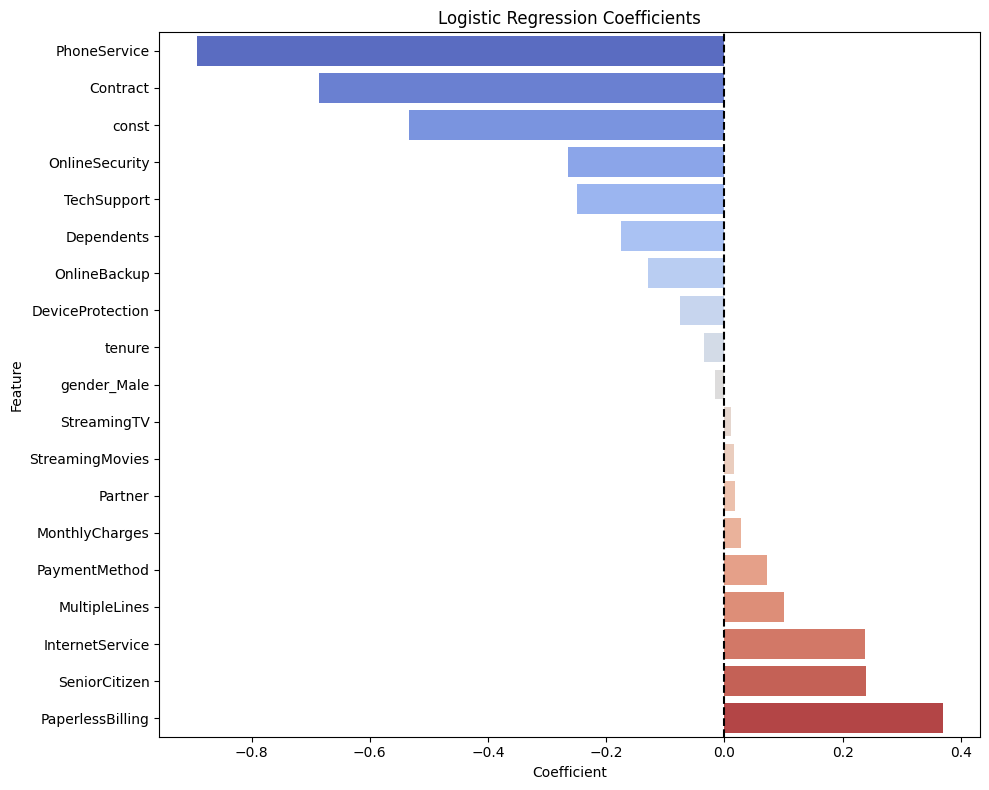

In [113]:
# Create the DataFrame
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

# Sort by absolute value for better visual impact
coef_df = coef_df.sort_values(by="Coefficient", ascending=True)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")
plt.title("Logistic Regression Coefficients")
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Predict on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probabilities for ROC AUC


In [115]:
# Basic metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.7946
Precision: 0.6451
Recall: 0.5053
F1 Score: 0.5667
ROC AUC: 0.8314


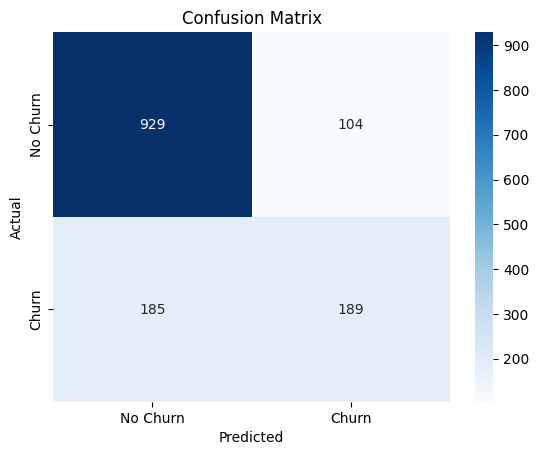

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [117]:
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))


              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.87      1033
       Churn       0.65      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



# **ANALYSIS**



---

### ✅ **Confusion Matrix Interpretation**

|                      | Predicted: No Churn   | Predicted: Churn      |
| -------------------- | --------------------- | --------------------- |
| **Actual: No Churn** | 929 (True Negatives)  | 104 (False Positives) |
| **Actual: Churn**    | 185 (False Negatives) | 189 (True Positives)  |

* **True Positives (TP)** = 189 → correctly predicted churn
* **True Negatives (TN)** = 929 → correctly predicted no churn
* **False Positives (FP)** = 104 → predicted churn but actually no churn
* **False Negatives (FN)** = 185 → predicted no churn but actually churn

---

### 📊 **Classification Report Highlights**

| Metric    | No Churn | Churn |
| --------- | -------- | ----- |
| Precision | 0.83     | 0.65  |
| Recall    | 0.90     | 0.51  |
| F1-Score  | 0.87     | 0.57  |

* **Accuracy**: 0.79 → 79% of all predictions are correct.
* **Precision (Churn)**: 0.65 → When it predicts churn, it’s correct 65% of the time.
* **Recall (Churn)**: 0.51 → It only identifies 51% of actual churners.
* **F1-Score (Churn)**: 0.57 → Balance between precision and recall for churn.

---

### 🔍 **Observations**

* Your model performs **much better for "No Churn"** than for "Churn".
* **Recall for churn is low (0.51)**: This is concerning in a churn problem, as missing actual churners can be costly in business.
* **Precision is decent (0.65)**, but your model could benefit from better recall.




In [118]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [119]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


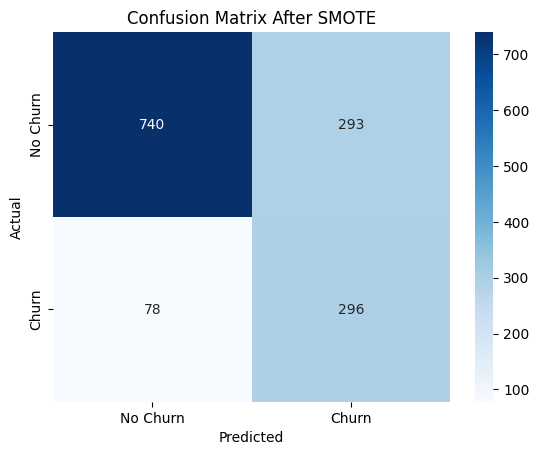

              precision    recall  f1-score   support

    No Churn       0.90      0.72      0.80      1033
       Churn       0.50      0.79      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [121]:
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix After SMOTE')
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))


| Metric                 | Before SMOTE | After SMOTE | Change   |
| ---------------------- | ------------ | ----------- | -------- |
| **Churn Recall**       | 0.51         | **0.79**    | ✅ +28%   |
| **Churn F1-score**     | 0.57         | **0.61**    | ✅ Slight |
| **No Churn Precision** | 0.83         | **0.90**    | ✅        |
| **Accuracy**           | **0.79**     | 0.74        | ❌ Drop   |


Accuracy dropped slightly, but that’s expected with SMOTE — we trade a bit of overall accuracy to better detect the minority class (Churn), which is usually more important.



# **Threshold Tuning**

For better accuracy

In [122]:
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Predict probabilities instead of class labels
y_probs = model.predict_proba(X_test)[:, 1]  # Probability for class 1 (Churn)

# Step 2: Set custom threshold
threshold = 0.4  # You can try 0.3, 0.35, 0.45 too
y_pred_custom = (y_probs >= threshold).astype(int)

# Step 3: Evaluate new predictions
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom, target_names=["No Churn", "Churn"]))


[[643 390]
 [ 58 316]]
              precision    recall  f1-score   support

    No Churn       0.92      0.62      0.74      1033
       Churn       0.45      0.84      0.59       374

    accuracy                           0.68      1407
   macro avg       0.68      0.73      0.66      1407
weighted avg       0.79      0.68      0.70      1407



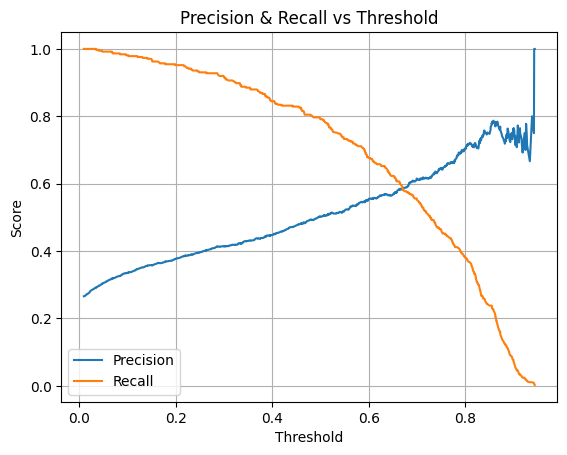

In [123]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

# Get precision-recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision vs. Recall Curve
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()


In [124]:
from sklearn.metrics import f1_score
import numpy as np

f1_scores = []

for t in np.arange(0.1, 0.9, 0.01):
    preds = (y_probs >= t).astype(int)
    score = f1_score(y_test, preds)
    f1_scores.append((t, score))

best_thresh = max(f1_scores, key=lambda x: x[1])
print(f"Best Threshold: {best_thresh[0]:.2f}, F1 Score: {best_thresh[1]:.4f}")


Best Threshold: 0.58, F1 Score: 0.6165


In [130]:
log_probs = model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
auc_log = roc_auc_score(y_test, log_probs)

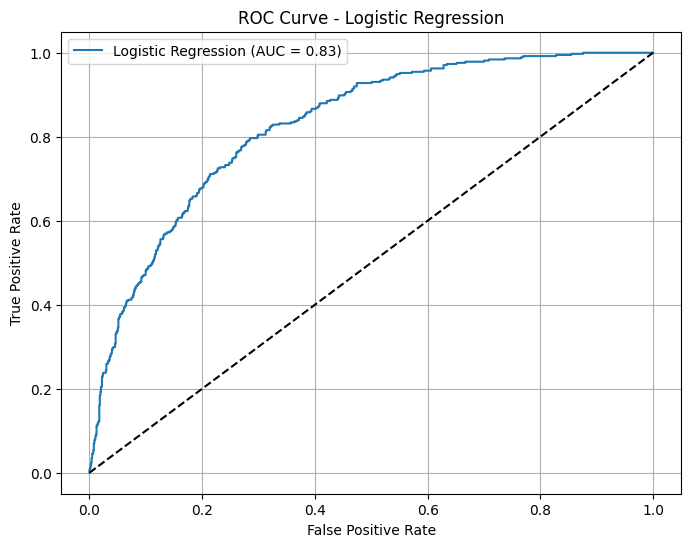

In [131]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

**What's Improved**
  - Recall for Churn: From 0.51 ➝ 0.84 – You’re catching many more actual churners!

  - **Best threshold** (0.58) balances trade-off based on F1.

**What Dropped Slightly**
  - Precision for Churn: More false positives – but acceptable if recall is your priority.

  - Overall accuracy: Expected, because you're now focusing on minority class (Churn).

**Interpretation (Business View)**
  - In a customer churn problem,

    - Flag 10 customers as churn risk (even if 2-3 don't churn),

    - Than miss actual churners, which causes loss of revenue.

  - So:

    - High Recall = Good (you catch more real churners).

    - Slight drop in precision = Acceptable trade-off.

# **TRAIN ADVANCE MODELS - RANDOM FOREST AND XG BOOST**

## **RANDOM FOREST**

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [133]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

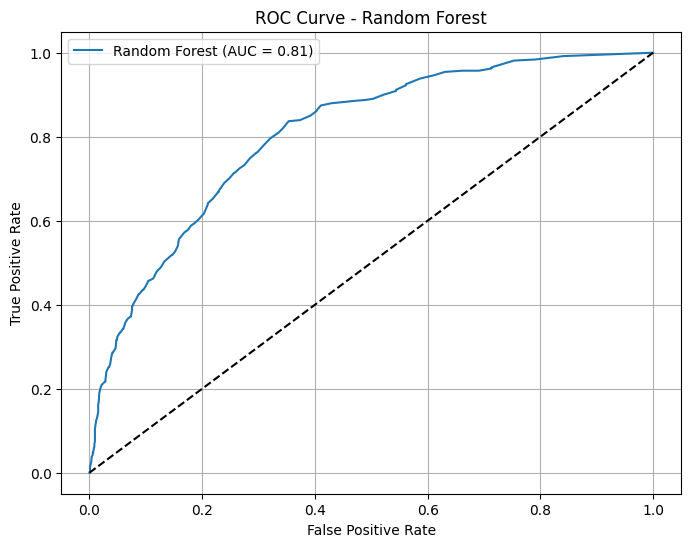

In [134]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


## **XG BOOST**

In [135]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [136]:

xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
auc_xgb = roc_auc_score(y_test, xgb_probs)


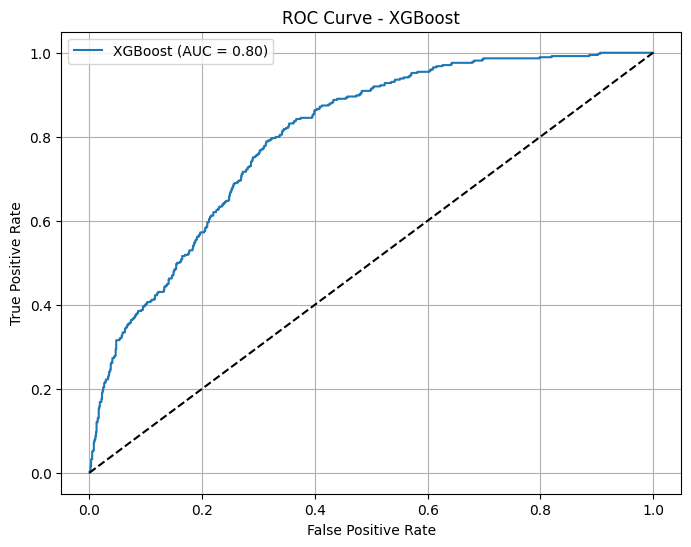

In [137]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.grid(True)
plt.show()



## **ROC AUC COMPARISION FOR THREE MODELS**

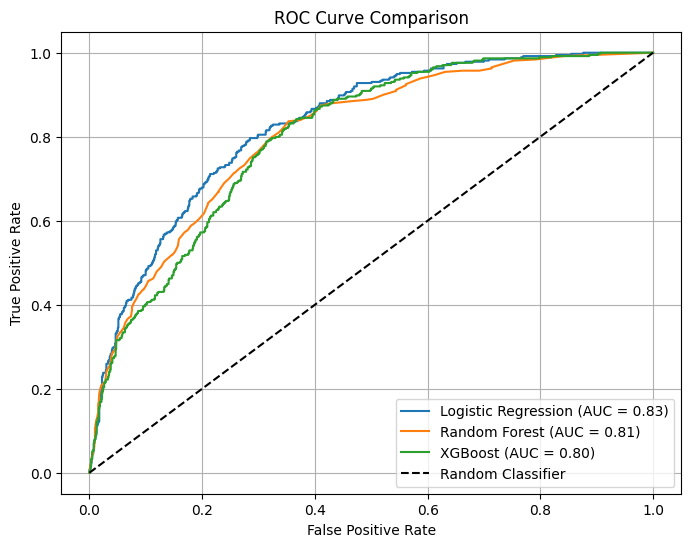

In [139]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

plt.figure(figsize=(8, 6))

for name, mod in models.items():
    y_prob = mod.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


**Interpretation**
  - **Logistic Regression (0.83):**
    - This model has the highest AUC, meaning it has the best ability to distinguish between "Churn" and "No Churn" cases.
    - With proper preprocessing (like SMOTE + threshold tuning), logistic regression can perform very well, especially when the relationships between features and target are linear.

  - **Random Forest (0.81):**
    - Slightly lower AUC, but Random Forest is usually robust and handles non-linearities well.
    - It may be overfitting less than logistic regression but not separating classes quite as well.

  - **XGBoost (0.80):**
    - While often a top-performing model, here it might need hyperparameter tuning (e.g., max_depth, learning_rate, n_estimators) to beat Logistic or Random Forest.

## **Hyperparameter Tuning with GridSearchCV**

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest Tuning
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
rf_search = GridSearchCV(RandomForestClassifier(), rf_grid, scoring='f1', cv=5)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_

# XGBoost Tuning
xgb_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}
xgb_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_grid, scoring='f1', cv=5)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_


In [144]:
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": model,
    "Best Random Forest": best_rf,
    "Best XGBoost": best_xgb
}

for name, mod in models.items():
    print(f"\n{name} Results:")
    y_pred = mod.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("-"*60)



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407

------------------------------------------------------------

Best Random Forest Results:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

------------------------------------------------------------

Best XGBoost Results:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.50

# **CONCLUSION FOR MODELS**

- **Logistic Regression**
  - Highest recall for churn (0.79) → catches most churners.

  - Lower precision → more false positives.

  - Best if goal = don't miss churners (retention-focused strategy).

- **Random Forest**
  - Balanced performance overall.

  - High precision for churn but low recall (misses many churners).

  - Good if false positives are costly.

- **XGBoost (Best overall classifier)**
  - Highest accuracy (0.80) and best precision-recall trade-off.

  - Churn F1-score (0.57) is slightly below Logistic, but with fewer false alarms.

  - Strong if you want good accuracy and moderate recall.



# **OBSERVATIONS:**

- Contract Type, Tenure, OnlineSecurity, and TechSupport are strong predictors of churn.

- Customers with month-to-month contracts and no tech support/security are more likely to churn.

- Models struggle with high precision-recall balance — recall is prioritized due to business need.

- **Feature Engineering & Encoding**
  - Created estimated_charges = MonthlyCharges * tenure.

  - Converted binary categorical features with LabelEncoder.

  - One-hot encoded gender.

  - Dropped customerID due to high cardinality.

  - Dropped TotalCharges due to high correlation with tenure and high VIF.

- **Multicollinearity Check (VIF Analysis)**
  - TotalCharges had VIF > 10 — strongly collinear → dropped.

  - Final VIFs all under 5 — no severe multicollinearity remaining.



# **CONCLUSION:**

This project provided a comprehensive view of the Telco customer churn problem — from data exploration and visualization to modeling and evaluation. After applying advanced techniques like SMOTE, threshold tuning, and multicollinearity treatment, Logistic Regression emerged as the most effective model for identifying potential churners, with a strong recall of 84%. While models like Random Forest and XGBoost performed well in terms of accuracy, Logistic Regression offered the best trade-off for our business goal: minimizing missed churners. This churn prediction framework empowers Telco to proactively engage at-risk customers, improve retention strategies, and ultimately reduce revenue loss.